In [413]:
import csv as csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

Alex added this

In [414]:
pd.set_option("display.max_rows", 10, "display.max_columns", 20)

In [415]:
df = pd.read_csv('./City_Zhvi_SingleFamilyResidence.csv')

In [416]:
df1 = df.drop(df.iloc[:,9:299] ,axis =1)

In [417]:
df1 = df1.sort_values(['2020-03-31', 'SizeRank'] ,ascending=True)

In [418]:
df1 = df1.drop(['RegionID', 'SizeRank', 'StateName', 'Metro', 'Unnamed: 0', 'RegionType'] ,axis = 1)

In [419]:
df1 = df1.rename(columns = {'2020-03-31':'median_home_price_2020'})

In [420]:
df = pd.read_csv('City_Zri_SingleFamilyResidenceRental.csv')
df.shape

(12413, 111)

In [421]:
df = df.drop(df.iloc[:,7:110] ,axis =1)

In [422]:
df2 = df.sort_values('2019-06', ascending=True)

In [423]:
df2 = df2.drop(['SizeRank', 'RegionID', 'Metro', 'Unnamed: 0'], axis = 1)

In [424]:
df2 = df2.rename(columns = {'2019-06':'median_rental_price_2019'})

In [425]:
df3 = pd.merge(df1, df2, on = ['State', 'RegionName'], how='inner')

In [426]:
df3 = df3.drop('CountyName_y', axis=1).rename({'CountyName_x': 'CountyName'}, axis=1)

In [427]:
df3 = df3.sort_values('median_rental_price_2019',ascending = False)

In [428]:
def min_rent_calc(home_value):
    if home_value >= 1000000:
        return home_value * .005
    else:
        return home_value * .01

In [429]:
# Set equal to min_rent_price column
df3['median_home_price_2020'].apply(min_rent_calc)

11227    23995.985
11229    27621.520
11215    16037.930
11228    27115.640
11230    33314.850
           ...    
3          246.050
29         314.290
39         346.770
9          291.570
13         309.340
Name: median_home_price_2020, Length: 11231, dtype: float64

In [430]:
df3['min_monthly_rent'] = df3.iloc[:,3]*.01

In [431]:
df3[df3['median_rental_price_2019'] > df3['min_monthly_rent']]

,RegionName,State,CountyName,median_home_price_2020,median_rental_price_2019,min_monthly_rent
5827,Belle Haven,VA,Accomack County,213255.0,3055,2132.55
1030,Salisbury,NY,Herkimer County,96913.0,3046,969.13
5738,Northampton,PA,Northampton County,210775.0,2538,2107.75
540,Rose Hill,VA,Lee County,79915.0,2503,799.15
1376,Montgomery,PA,Lycoming County,106525.0,2466,1065.25
...,...,...,...,...,...,...
3,Flint,MI,Genesee County,24605.0,604,246.05
29,West End-Cobb Town,AL,Calhoun County,31429.0,603,314.29
39,Taft,OK,Muskogee County,34677.0,598,346.77
9,East Conemaugh,PA,Cambria County,29157.0,597,291.57


In [432]:
df3['profit'] = df3['min_monthly_rent'] - df3['median_rental_price_2019']

In [433]:
df3['Region'] = [region_name + ', ' + state for region_name, state in zip(df3['RegionName'], df3['State'])] 

<AxesSubplot:xlabel='Region'>

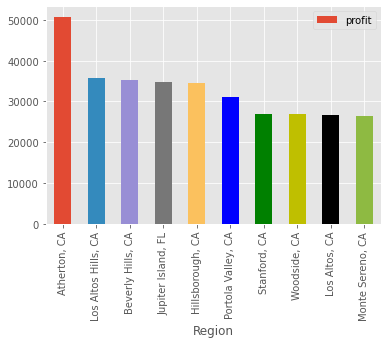

In [449]:
df3[df3.profit > 0].sort_values('profit', ascending=False).head(10).plot(kind='bar', x='Region', y='profit',color=['C0', 'C1', 'C2', 'C3', 'C4','b','g','y','k','C5'])

<AxesSubplot:xlabel='State'>

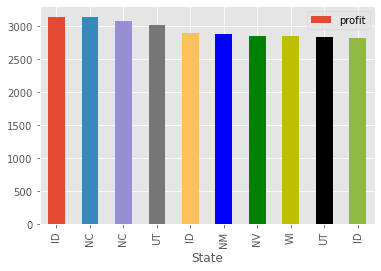

In [435]:
df3[df3.median_home_price_2020 < 500000].groupby('State').head(10).sort_values('profit', ascending=False).head(10).plot(kind = 'bar',x='State', y='profit',color=['C0', 'C1', 'C2', 'C3', 'C4','b','g','y','k','C5'])

<AxesSubplot:xlabel='State'>

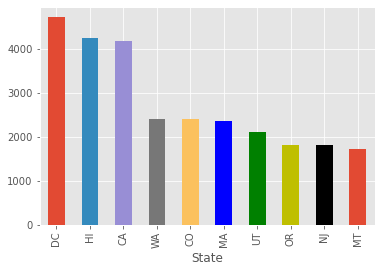

In [450]:
df3.groupby(['State'])['profit'].mean ().sort_values(ascending = False).head(10).plot(kind='bar', x='State', y='profit',color=['C0', 'C1', 'C2', 'C3', 'C4','b',  'g', 'y', 'k'])

<AxesSubplot:xlabel='Region'>

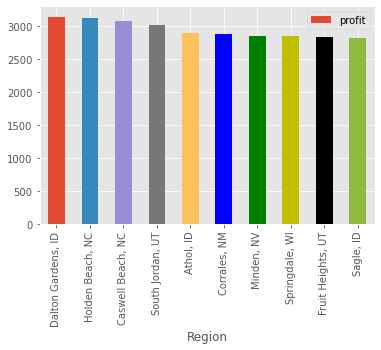

In [437]:
df3[df3.median_home_price_2020 < 500000].groupby('State').head(10).sort_values('profit', ascending=False).head(10).plot(kind = 'bar',x='Region', y='profit',color=['C0', 'C1', 'C2', 'C3', 'C4','b','g','y','k','C5'])

In [438]:
interest = 0.035 / 12               
thirty_year = 30 * 12 
fifteen_year = 15 * 12 
price = 737939.0  

In [439]:
def MortgagePayment (p,i,n):
    return p*(i*(1 + i)**n)/((1 + i)**n-1)

In [440]:
MortgagePayment(4799197.0,interest,thirty_year)

21550.539185980422

In [441]:
price = df3['median_home_price_2020']

In [442]:
df3['monthly_Mortgage_payment'] = MortgagePayment(price, interest, thirty_year)

In [453]:
df3['Montly_Mortgate_Profit'] = df3.monthly_Mortgage_payment - df3.median_rental_price_2019 + 4000

<AxesSubplot:xlabel='State'>

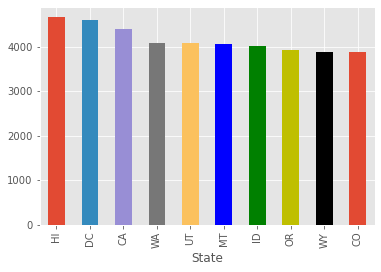

In [455]:
df3.groupby(['State'])['Montly_Mortgate_Profit'].mean ().sort_values(ascending = False).head(10).plot(kind='bar', x='State', y='profit',color=['C0', 'C1', 'C2', 'C3', 'C4','b',  'g', 'y', 'k'])

In [456]:
pwd

'C:\\Users\\BrendanHutchinson\\git_proj\\project_1'

In [457]:
cd C:\Users\BrendanHutchinson\Python-Project-1

C:\Users\BrendanHutchinson\Python-Project-1


In [465]:
c.NotebookApp.notebook_dir = 'C:\Users\BrendanHutchinson\Python-Project-1'

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-465-840a02a9c690>, line 1)